In [124]:
#import all the libraries required to begin with 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import re
import warnings
from scipy import stats
from IPython.core.display import HTML
sns.set(style='whitegrid')
sns.set(color_codes = True)

In [125]:
loanDS= pd.read_csv('loan.csv', low_memory=False)

In [126]:
loanDS.shape

(39717, 111)

In [127]:
# check shape, general information & datatype of loan data set

loanDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [128]:
loanDS.dtypes


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [129]:
#STEP 2 - DATA CLEANING

#Check for any missing values or data 

loanDS.shape
loanDS.isna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [130]:
# will return sum of missing values for each column

loanDS.isna().sum() 


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

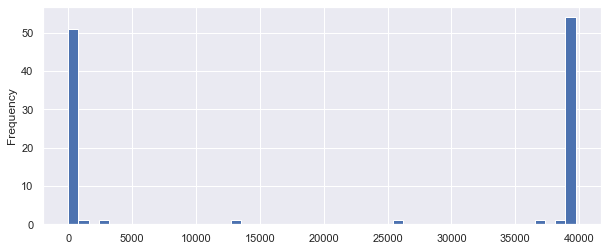

In [131]:
#Let us do some cleanup of NULLs from rows and columns of the loan dataframe
l = loanDS.isnull().sum()
l.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()




#Observation -In the below figure, X-axis contains number of NULL values and Y-axis contains number of columns.
#We can clearly see that there is a huge spike towards the 40K mark. 
#The total records in our data is 39,717. We would not require the columns that have all NULLs. Also, we see there are few columns above 10K mark,we will accordingly check and delete or drop off those columns for a better analysis.

In [132]:
#missing values per column expressed as percentage of total number of values (calculating the percentage missing to have a rough idea of the data we are working on)

missing = round(100*(loanDS.isnull().sum()/len(loanDS.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [133]:
#Many columns above have 100% missing values . For better analysis , removing the columns that have more than 70% data values missing.

columns_with_missing_values = list(missing[missing >= 70].index)

len(columns_with_missing_values)

56

In [134]:
l.loc[(l.values > 10000) & (l.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [135]:
#drop all columns having above 10K NULL values in them.
loanDS.drop(columns=list(l[l.values > 10000].index), inplace=True)
loanDS.shape

(39717, 53)

In [136]:
#More cleaning check - Identify columns with unique or single values
unique_col= loanDS.nunique()
print(unique_col)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [137]:
#Removing all those columns with single values as they will not be of much use in our data analysis
l1 = unique_col[unique_col.values == 1]
l1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [138]:
#drop above columns 
loanDS.drop(columns = list(l1.index), inplace=True)
loanDS.shape

(39717, 44)

In [139]:
#Further Data cleaning - to eliminate unnecessary or non -contributing data
#Removing the columns/fields that contains data after the loan is approved is non contributing as our objective is to find out which loan applications are risky for the business and also what applications are to be approved that can ensure profit. 

del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loanDS.drop(columns=del_cols, inplace=True)
loanDS.shape

(39717, 28)

In [140]:
loanDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [141]:
#Column pub_rec_bankruptcies are clearly Categorical with values belonging to a range.

#Let's take a look at all the different values of these Categorical columns

loanDS.pub_rec_bankruptcies.unique()

#Deep look at the pub_rec_bankruptcies categorical column.Tells us about the past number of public record bankruptcies of that borrower.
loanDS.pub_rec_bankruptcies.value_counts()


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [142]:
#OBSERVATION-pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 37000 records with 0 record of bankrupcies, 1600 records having one bankrupcies case and 7 records with two bankrupcies case.

# We could have taken the mode representation of the data which is 0 bankruptcies for imputation of the missing values. But, we decide to remove the rows instead so that we make sure we dont add any bias to the data.

loanDS=loanDS[~loanDS.pub_rec_bankruptcies.isnull()]

In [143]:
loanDS.shape

(39020, 28)

In [144]:
# Lets format employment length column to have only numbers. It may play important role in analysis further.

loanDS.emp_length.fillna('0',inplace=True)
loanDS['emp_length']=loanDS.emp_length.str.extract('(\d+)')
loanDS.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8,...,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9,...,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4,...,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,1,...,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0


In [145]:
# Data cleaning
# Lets remove % symbol from interest rate column so that it can be used in numerical calculations
loanDS['int_rate'] = loanDS['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loanDS['revol_util'] = loanDS['revol_util'].str.rstrip('%')

In [146]:
# converting amount columns into numeric data to find some correlation among important ones.

l1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
loanDS[l1] = loanDS[l1].apply(pd.to_numeric)

In [147]:
# look at the  important variable loan status in total loans issued columm

(loanDS.loan_status.value_counts()*100)/len(loanDS)

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

Fully Paid     82.960021
Charged Off    14.118401
Current         2.921579
Name: loan_status, dtype: float64

In [148]:
# look at the important variable purpose of loan in total loans issued

(loanDS.purpose.value_counts()*100)/len(loanDS)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    47.027166
credit_card           12.895951
other                  9.964121
home_improvement       7.503844
major_purchase         5.556125
small_business         4.548949
car                    3.926192
wedding                2.378268
medical                1.752947
moving                 1.471040
house                  0.963608
vacation               0.961046
educational            0.786776
renewable_energy       0.263967
Name: purpose, dtype: float64

In [149]:
# Derived columns
# Lets derive some new columns using existing data which can contribute to further analysis
# create month and year columns separately

loanDS.issue_d = pd.to_datetime(loanDS.issue_d, format='%b-%y')
loanDS['year']=loanDS['issue_d'].dt.year
loanDS['month']=loanDS['issue_d'].dt.month

loanDS.head(10)

# Observations
# Two new columns month and year were derived from issue date

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,...,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,...,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Feb-96,1,10,0,5598,21,37,0.0,2011,12
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,...,Jan-96,0,15,0,27783,53.90,38,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,...,Nov-04,3,9,0,7963,28.30,12,0.0,2011,12
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,...,Jul-05,1,7,0,17726,85.60,11,0.0,2011,12
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9,...,Jan-07,2,4,0,8221,87.50,4,0.0,2011,12
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4,...,Apr-04,2,11,0,5210,32.60,13,0.0,2011,12
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,1,...,Sep-04,0,2,0,9279,36.50,3,0.0,2011,12


In [150]:
#DATA PREPARATION

#Analyse each column seperately in detail to eliminate or check for not necessary info .

#loan status column - Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

loanDS = loanDS[~(loanDS['loan_status'] == 'Current')]
loanDS.shape

## Observations from above 
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off


(37880, 30)

In [151]:
#Loan term column

loanDS['term'].value_counts()

 36 months    28399
 60 months     9481
Name: term, dtype: int64

In [152]:
loanDS['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

<AxesSubplot:>

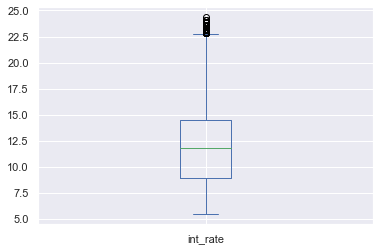

In [153]:
loanDS['int_rate'].plot.box()

#OBSERVATION - see some outlier values in int_rate column which needs to analysed for univariate analysis.

In [154]:
loanDS['grade'].value_counts()

B    11466
A     9903
C     7651
D     4974
E     2628
F      961
G      297
Name: grade, dtype: int64

In [155]:
loanDS['sub_grade'].value_counts()

A4    2843
B3    2789
A5    2683
B5    2573
B4    2395
C1    2004
B2    1955
C2    1898
A3    1771
B1    1754
A2    1478
C3    1453
D2    1261
C4    1171
A1    1128
C5    1125
D3    1095
D1     903
D4     895
D5     820
E1     713
E2     605
E3     513
E4     415
E5     382
F1     302
F2     228
F3     171
F4     148
F5     112
G1      93
G2      77
G4      54
G3      45
G5      28
Name: sub_grade, dtype: int64

In [156]:
print(loanDS['emp_title'].value_counts().head())
print(loanDS['emp_title'].unique().shape)

US Army              129
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Name: emp_title, dtype: int64
(27552,)


In [157]:
loanDS['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0], dtype=int64)

In [158]:
loanDS.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'year',
       'month'],
      dtype='object')

In [159]:
loanDS['home_ownership'].value_counts()

RENT        18100
MORTGAGE    16769
OWN          2913
OTHER          98
Name: home_ownership, dtype: int64

In [160]:
loanDS['verification_status'].value_counts()

Not Verified       15998
Verified           12205
Source Verified     9677
Name: verification_status, dtype: int64

In [161]:
len(loanDS['title'].value_counts())

18881

In [162]:
loanDS['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [163]:
loanDS['title'].sample(10)

12499                  Debt Consolidation Loan
13129                       Consolidation Loan
25364                         home improvement
7829                              New Computer
2465                        consolidation loan
27936         getting rid of dumb credit cards
22867                          alex relocation
8341                            prosperitynow!
24982                       Debt Consolidation
35853    Pay off all my debts with one payment
Name: title, dtype: object

In [164]:
#Dropping the title column as it has too many unique values as seen from above.

loanDS.drop(columns=['title'], inplace=True)

In [165]:
loanDS['addr_state'].value_counts()

CA    6866
NY    3611
FL    2729
TX    2613
NJ    1757
IL    1466
PA    1459
VA    1336
GA    1334
MA    1259
OH    1161
MD     998
AZ     837
WA     795
CO     743
NC     719
CT     716
MI     695
MO     662
MN     598
NV     476
SC     451
OR     429
AL     428
WI     423
LA     418
KY     309
OK     286
KS     253
UT     246
AR     232
DC     208
RI     192
NM     177
WV     172
HI     165
NH     163
DE     111
MT      83
WY      79
AK      77
SD      61
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: addr_state, dtype: int64

In [166]:
loanDS['earliest_cr_line'].value_counts()

Oct-99    357
Nov-98    352
Oct-00    336
Dec-98    334
Nov-99    313
         ... 
Sep-56      1
Jun-66      1
Jan-46      1
Dec-50      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [167]:
from datetime import datetime
today = datetime.today()
today.year

2022

In [168]:
#In the earliest_cr_line field, we do see some data format inconsistencies. 
#Sometimes it has MMM-YY and at other times it has YY-MMM. Also, the year is a 2 digit. Therefore, we would need to apply some logic to extract meaningful data from here


def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-20")

loanDS['days_from_earliest_cr_line'] = loanDS['earliest_cr_line'].apply(days_from_earliest_cr_line)
loanDS['days_from_earliest_cr_line'].describe()

count    37880.000000
mean      9090.782629
std       2491.713229
min       4812.000000
25%       7430.000000
50%       8618.000000
75%      10261.000000
max      27762.000000
Name: days_from_earliest_cr_line, dtype: float64

In [169]:
loanDS.drop(columns=['earliest_cr_line'], inplace=True)

In [170]:
loanDS['revol_util'].head()


0    83.70
1     9.40
2    98.50
3       21
5    28.30
Name: revol_util, dtype: object

In [171]:
#Check the final prepared data 
loanDS.info()
loanDS.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   37880 non-null  int64         
 1   funded_amnt                 37880 non-null  int64         
 2   funded_amnt_inv             37880 non-null  float64       
 3   term                        37880 non-null  object        
 4   int_rate                    37880 non-null  float64       
 5   installment                 37880 non-null  float64       
 6   grade                       37880 non-null  object        
 7   sub_grade                   37880 non-null  object        
 8   emp_title                   35537 non-null  object        
 9   emp_length                  37880 non-null  int64         
 10  home_ownership              37880 non-null  object        
 11  annual_inc                  37880 non-null  float64   

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,year,month,days_from_earliest_cr_line
count,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,3.788000e+04,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000
mean,11067.092793,10801.615628,10367.230798,11.955992,322.469358,4.941077,6.876387e+04,13.317518,0.145750,0.869166,9.273152,0.055887,13282.625000,22.104356,0.043479,2010.357920,7.157101,9090.782629
std,7364.014949,7103.047727,6999.222837,3.710205,208.620127,3.452454,6.357379e+04,6.664633,0.490903,1.068493,4.383244,0.238724,15818.796763,11.420820,0.204583,0.810569,3.379528,2491.713229
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1.000000,4812.000000
25%,5375.000000,5200.000000,5000.000000,8.940000,165.820000,2.000000,4.000000e+04,8.190000,0.000000,0.000000,6.000000,0.000000,3667.000000,13.000000,0.000000,2010.000000,4.000000,7430.000000
50%,9637.500000,9600.000000,8974.845736,11.830000,277.760000,4.000000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8774.000000,20.000000,0.000000,2011.000000,7.000000,8618.000000
75%,15000.000000,15000.000000,14200.000000,14.460000,425.550000,9.000000,8.200000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,16916.000000,29.000000,0.000000,2011.000000,10.000000,10261.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,2011.000000,12.000000,27762.000000


In [172]:
#NOTE - percentage of loans paid vs charged off for all the records .
loan_status_percent = loanDS['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.854567
Charged Off    0.145433
Name: loan_status, dtype: float64

In [173]:
#Our new data set that we have devised is ready. Let us proceed with the EDA 

#UNIVARIATE ANALYSIS

#start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

# changing the loan_status to a numeric variable, 
#assign 1 for defaulted loans and 0 for paid off ones
loanDS['loan_status_num'] = loanDS['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)


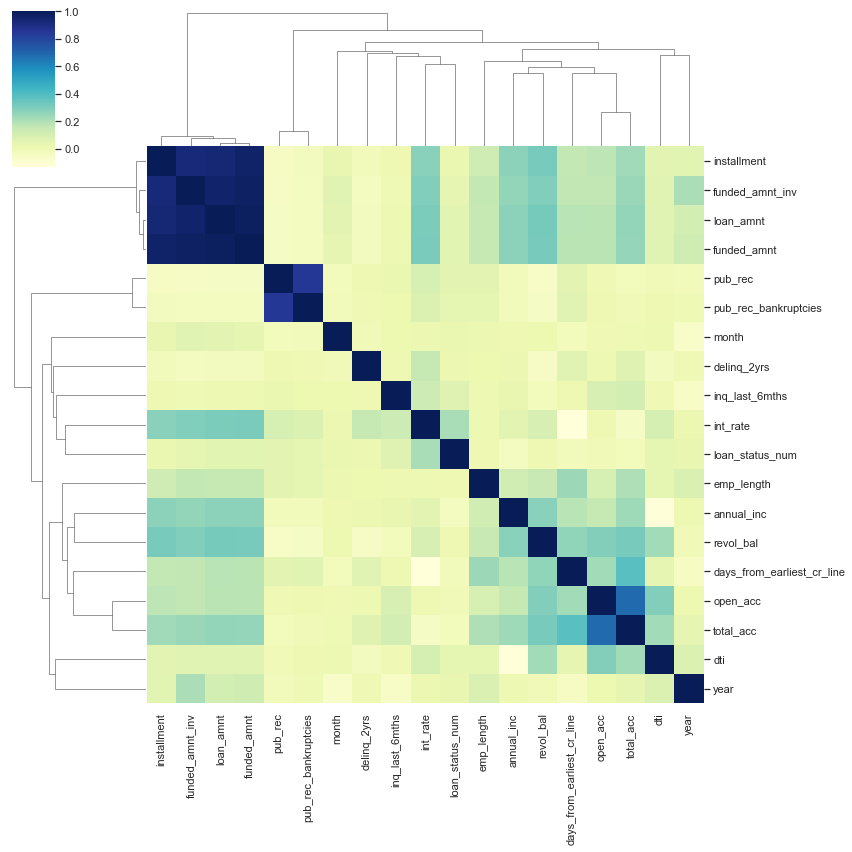

In [174]:
sns.set_style("whitegrid")
sns.clustermap(data=loanDS.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()


#OBSERVATION - darker the value, higher the correlation
#we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation 
#These fields are proportional to each other. 
#public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

In [175]:
# Basic statistics with .describe() - Quantitative Variables
loanDS['loan_amnt'].describe()



count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

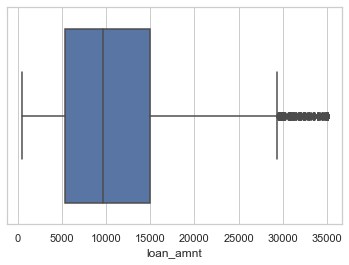

In [176]:
sns.boxplot(loanDS.loan_amnt)

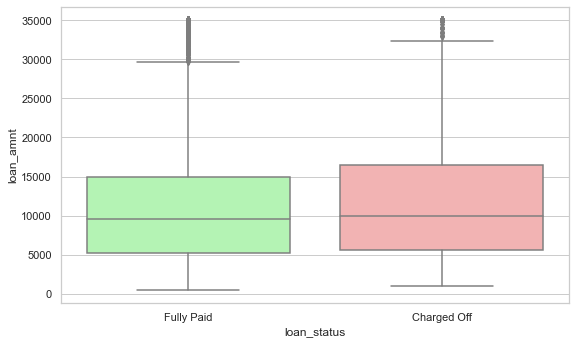

In [177]:
#Loan status VS numeric variables
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loanDS)
plt.show()

In [178]:
loanDS['loan_amnt'].describe()

#Observation - 1.Mean = 11067.09 From the boxplot , the difference between Mean and median is high. So we will limit our data to 75%.


count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

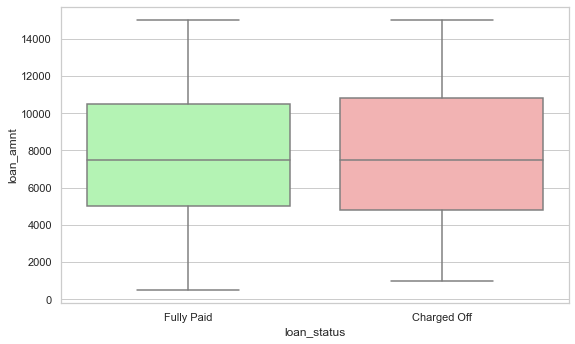

In [179]:

loan_75 = loanDS.loc[(loanDS['loan_amnt']<=15000)]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_75)
plt.show()

In [180]:
loan_above75 = loanDS.loc[(loanDS['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3,...,8,0,17813,85.60,22,0.0,2011,12,8830,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,Osram Sylvania,10,...,7,0,32135,90.30,38,0.0,2011,12,14217,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2,...,8,0,13707,93.90,31,0.0,2011,12,7277,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,nyc transit,9,...,7,0,5872,57.60,11,0.0,2011,12,6670,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5,...,12,0,23151,27.40,26,0.0,2011,12,14674,0


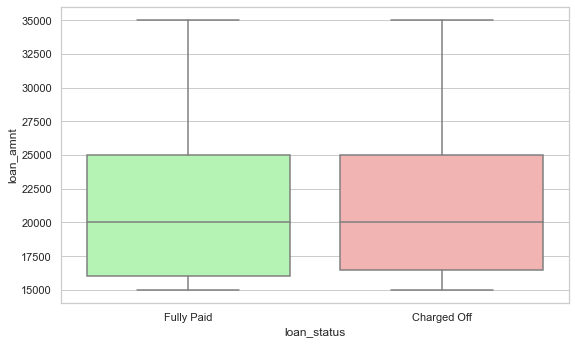

In [181]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

#OBSERVATION - "higher the amount" will tend to "Write off".

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gandhig\Anaconda3\lib\site-packages\seabo

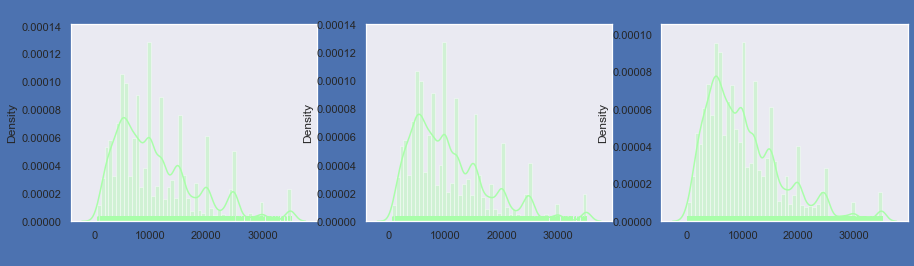

In [182]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loanDS['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loanDS['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loanDS['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='b')
plt.show()



# Observation: 
# Distribution of amounts for all three looks very much similar.


In [183]:
#DEFINING some default functions, so that we can re-use same function for all the columns since we have too many columns for univariate analysis
def PercentileCut (*, data=loanDS, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loanDS'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [184]:
loanDS.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'year', 'month',
       'days_from_earliest_cr_line', 'loan_status_num'],
      dtype='object')

In [185]:
def Univariate_Categorical_Data (*, data=loanDS, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loanDS.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loanDS.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

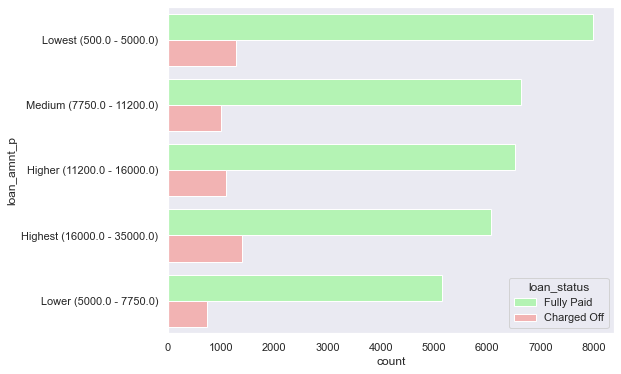

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.186009,7462
Higher (11200.0 - 16000.0),0.144656,7625
Lowest (500.0 - 5000.0),0.138898,9273
Medium (7750.0 - 11200.0),0.130589,7627
Lower (5000.0 - 7750.0),0.124555,5893


In [186]:
PercentileCut(column='loan_amnt')
Univariate_Categorical_Data(column='loan_amnt_p')

#OBSERVATION - Higher the loan amount, greater the chance of the loan getting defaulted

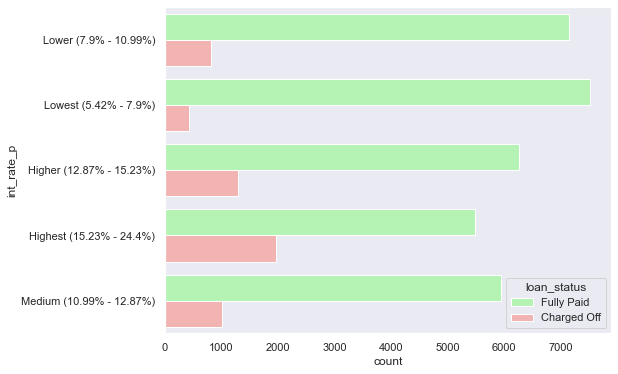

int_rate_p,Charged off %,Record count
Highest (15.23% - 24.4%),0.263574,7459
Higher (12.87% - 15.23%),0.172086,7566
Medium (10.99% - 12.87%),0.144420,6945
Lower (7.9% - 10.99%),0.102110,7962
Lowest (5.42% - 7.9%),0.053473,7948


In [187]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical_Data(column='int_rate_p')

#OBSERVATION - Higher the interest rate leads to higher charged off%

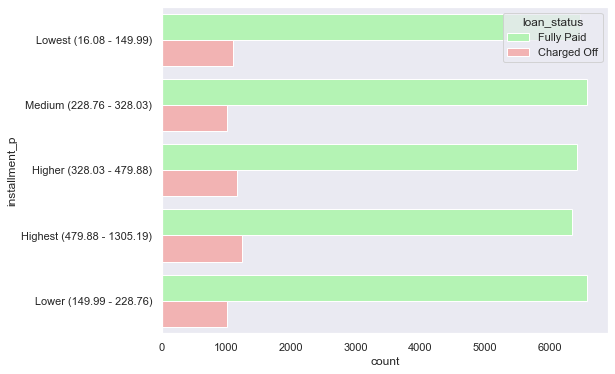

installment_p,Charged off %,Record count
Highest (479.88 - 1305.19),0.163279,7576
Higher (328.03 - 479.88),0.152983,7576
Lowest (16.08 - 149.99),0.145440,7577
Medium (228.76 - 328.03),0.133052,7576
Lower (149.99 - 228.76),0.132409,7575


In [188]:
PercentileCut(column='installment')
Univariate_Categorical_Data(column='installment_p')

#higher installment amounts shows higher default percentages.


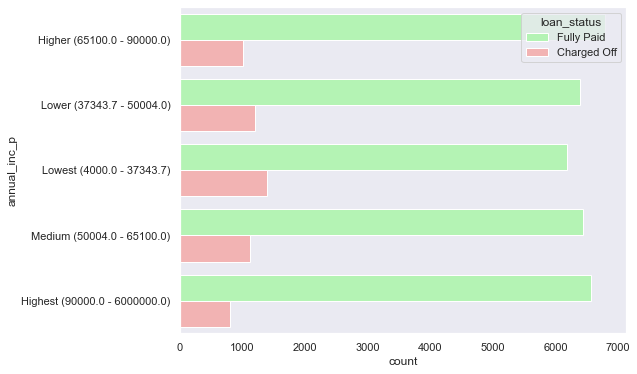

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37343.7),0.183474,7576
Lower (37343.7 - 50004.0),0.157597,7589
Medium (50004.0 - 65100.0),0.148995,7564
Higher (65100.0 - 90000.0),0.128767,7797
Highest (90000.0 - 6000000.0),0.107696,7354


In [189]:
PercentileCut(column='annual_inc')
Univariate_Categorical_Data(column='annual_inc_p')

#Higher the income higher the repayment percentage

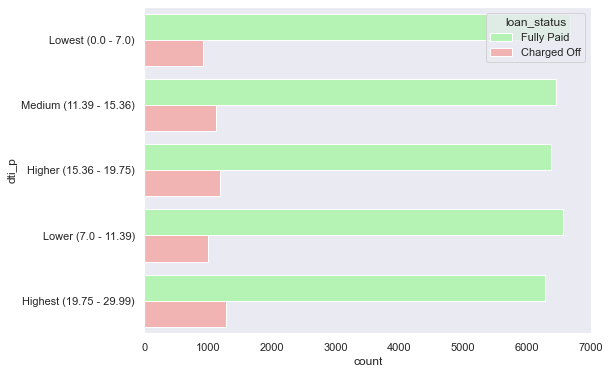

dti_p,Charged off %,Record count
Highest (19.75 - 29.99),0.168585,7557
Higher (15.36 - 19.75),0.156852,7574
Medium (11.39 - 15.36),0.148524,7588
Lower (7.0 - 11.39),0.131711,7562
Lowest (0.0 - 7.0),0.121595,7599


In [190]:
PercentileCut(column='dti')
Univariate_Categorical_Data(column='dti_p')

#higher DTI will lead to higher charged off %

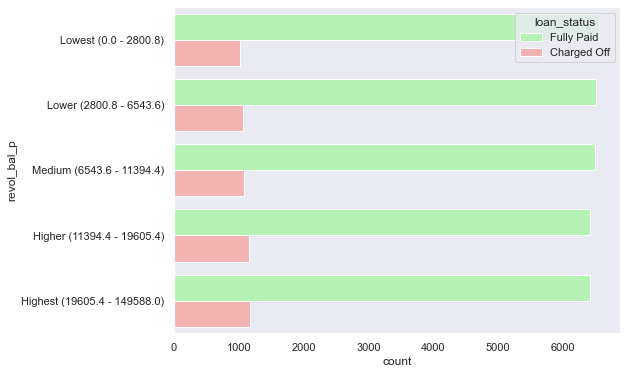

revol_bal_p,Charged off %,Record count
Highest (19605.4 - 149588.0),0.154303,7576
Higher (11394.4 - 19605.4),0.153775,7576
Medium (6543.6 - 11394.4),0.143347,7576
Lower (2800.8 - 6543.6),0.140576,7576
Lowest (0.0 - 2800.8),0.135164,7576


In [191]:
PercentileCut(column='revol_bal')
Univariate_Categorical_Data(column='revol_bal_p')

#Higher the revolving balance, bigger the chance of the loan getting defaulted.

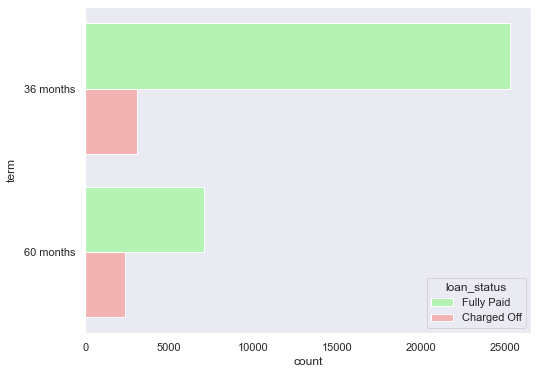

term,Charged off %,Record count
60 months,0.253138,9481
36 months,0.109476,28399


In [192]:
Univariate_Categorical_Data(column='term')

#For loans with 60 months repayment term, the default percent is 25%.
#For Loans with 36 months loan repayment term, the default is only for 11% of the cases. 

#Hence repayment term is a significant factor here.

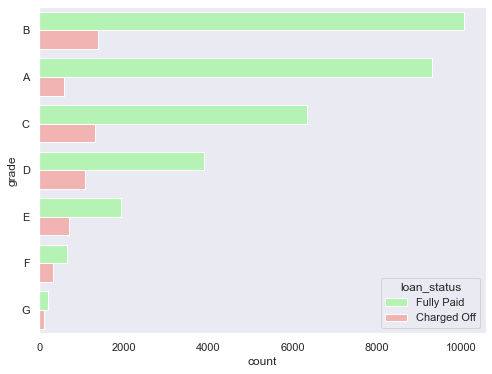

grade,Charged off %,Record count
G,0.340067,297
F,0.325702,961
E,0.268265,2628
D,0.218134,4974
C,0.171612,7651
B,0.121751,11466
A,0.060184,9903


In [193]:
Univariate_Categorical_Data(column='grade')

#loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.



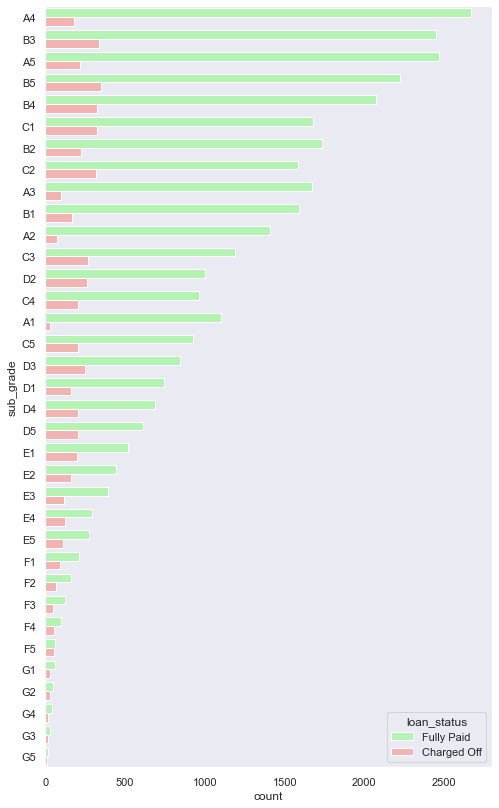

sub_grade,Charged off %,Record count
F5,0.473214,112
G3,0.422222,45
G2,0.363636,77
F4,0.358108,148
G5,0.357143,28
G1,0.333333,93
F2,0.302632,228
E4,0.298795,415
F1,0.294702,302
F3,0.286550,171


In [194]:
Univariate_Categorical_Data(column='sub_grade', figsize=(8,14))

#Look at  G3 and F5 sub categories that  have above 40% default rate. This field is a clear indicator of the default percent.

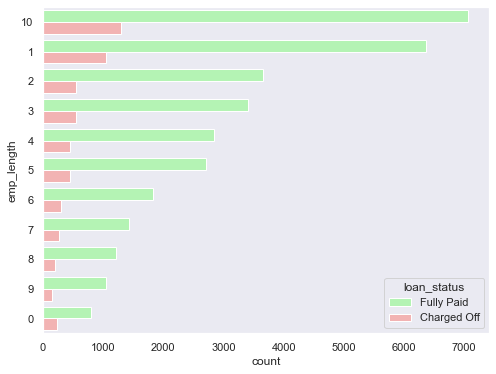

emp_length,Charged off %,Record count
0,0.220716,1033
10,0.155694,8369
7,0.152753,1689
5,0.143625,3161
1,0.142087,7418
8,0.141844,1410
6,0.140918,2136
3,0.138952,3951
4,0.136488,3297
2,0.132161,4207


In [195]:
Univariate_Categorical_Data(column='emp_length')

#non-conclusive

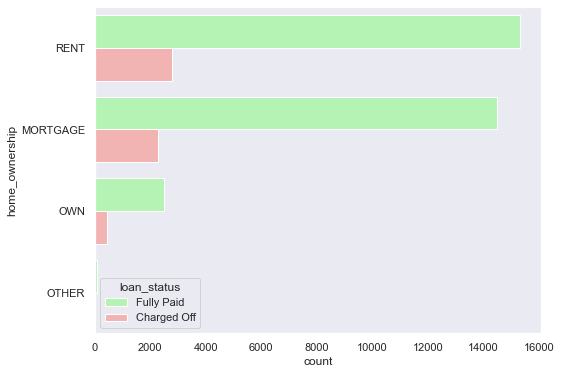

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153591,18100
OWN,0.147614,2913
MORTGAGE,0.136025,16769


In [196]:
Univariate_Categorical_Data(column='home_ownership')
#Non conclusive

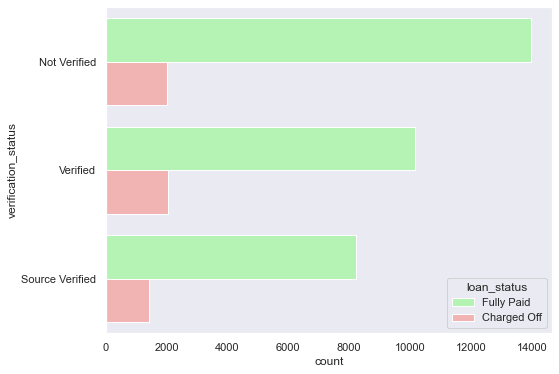

verification_status,Charged off %,Record count
Verified,0.168046,12205
Source Verified,0.148186,9677
Not Verified,0.126516,15998


In [197]:
Univariate_Categorical_Data(column='verification_status')
#Verified applicants have a higher charged off percentage . The verification process needs to be validated/ checked or changed. 

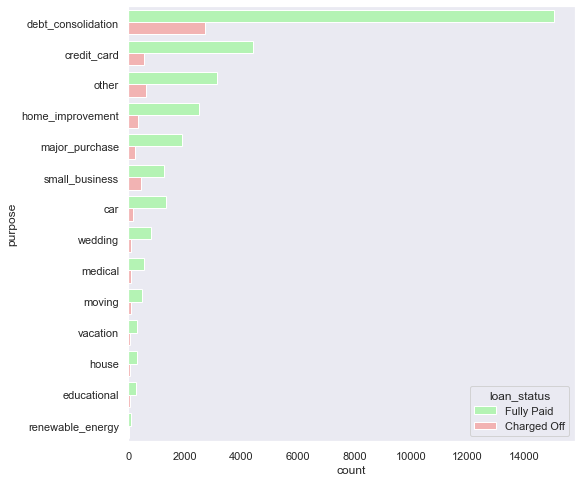

purpose,Charged off %,Record count
small_business,0.268665,1701
renewable_energy,0.186275,102
educational,0.172638,307
other,0.164628,3760
house,0.160221,362
moving,0.156966,567
medical,0.156250,672
debt_consolidation,0.152893,17764
vacation,0.143631,369
home_improvement,0.119561,2827


In [198]:
Univariate_Categorical_Data(column='purpose', figsize=(8,8))

#Loans taken for small business are the most riskier ones followed by renewable_energy

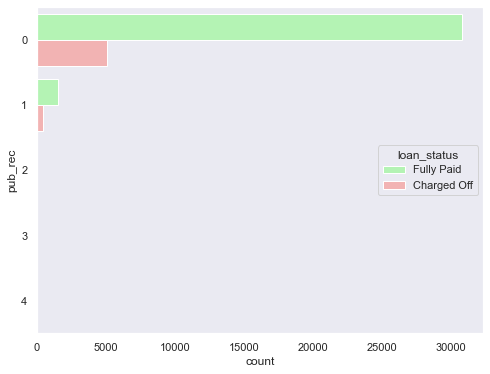

pub_rec,Charged off %,Record count
1,0.226179,1994
2,0.212766,47
0,0.140888,35830


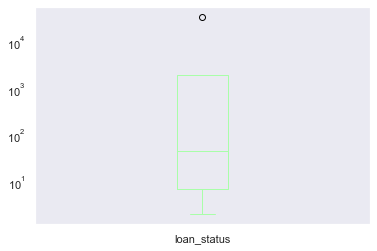

In [199]:
Univariate_Categorical_Data(column='pub_rec', box_plot=True)
#non-zero derogatory public records have higher chances of charged off

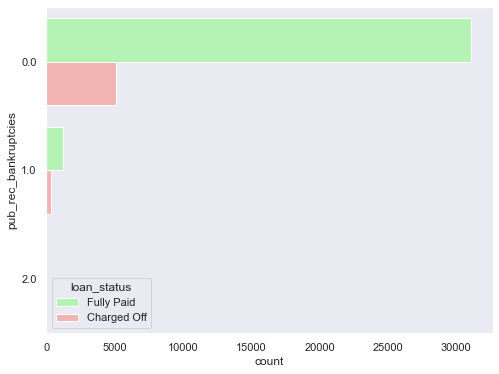

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.223580,1637
0.0,0.141868,36238


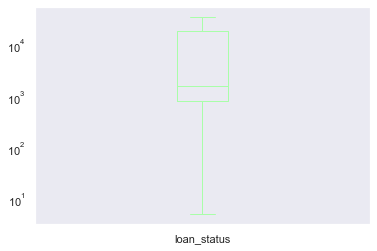

In [200]:
Univariate_Categorical_Data(column='pub_rec_bankruptcies', box_plot=True)

#Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


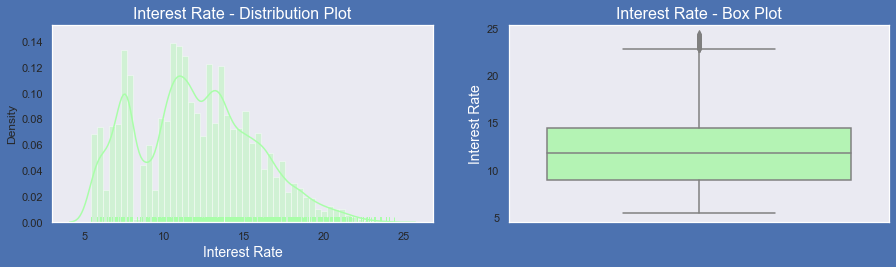

In [201]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanDS['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanDS['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

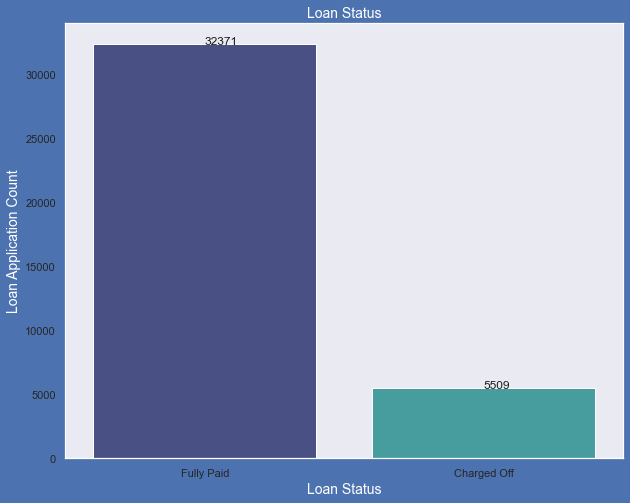

In [202]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loanDS,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loanDS['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

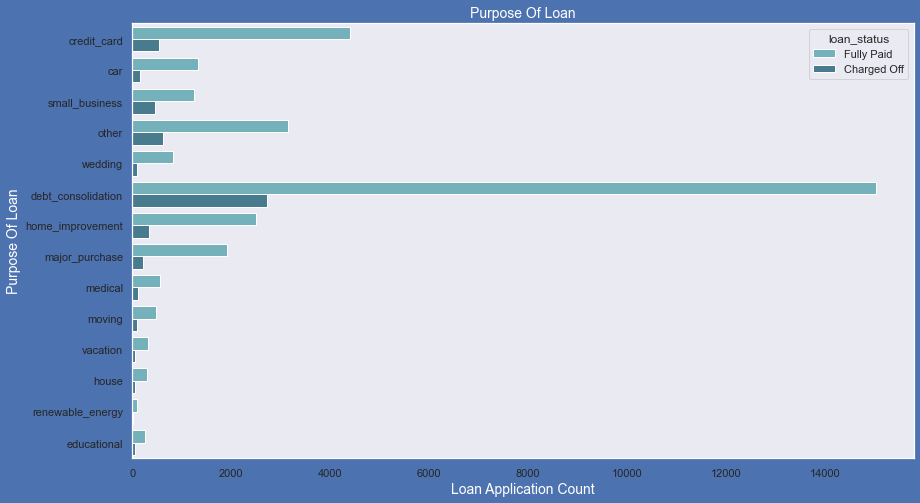

In [203]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loanDS,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of charged off count also high too for these loans.

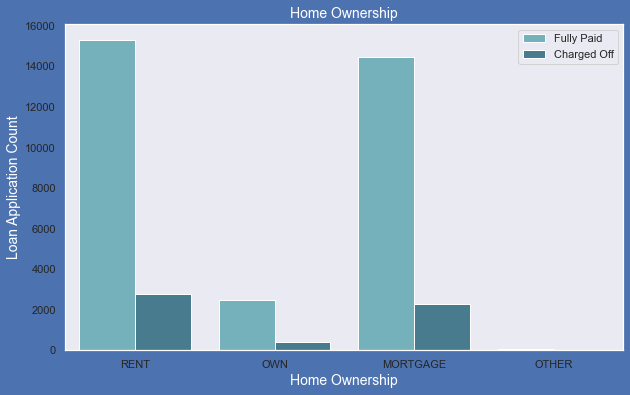

In [204]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loanDS,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgaged their homes.
# Applicant numbers are high from these categories so charged off is high too.

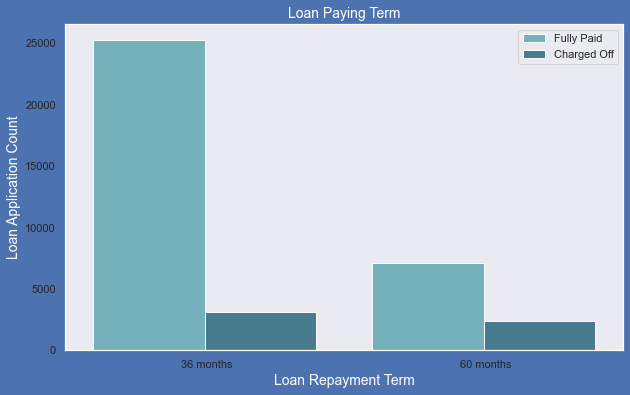

In [205]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loanDS,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.

In [206]:
#BIVARIATE ANALYSIS

#Now that we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and and analyze their combined effect on the loan-status. These categories are based on our business understanding. The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions.
def Bivariate_Analysis (*, data=loanDS, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [207]:
def Bivariate_Categorical (*, data=loanDS, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

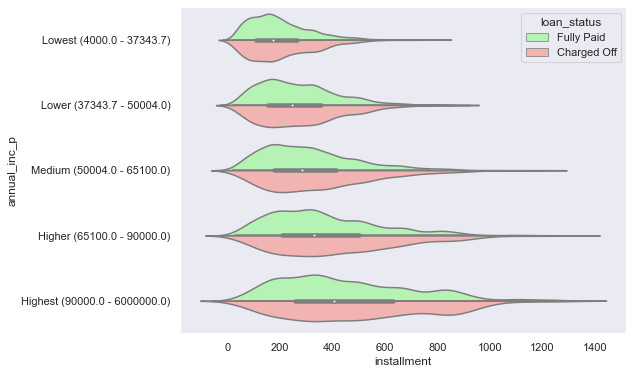

In [208]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

#for higher installments for any income group have more number of defaults.

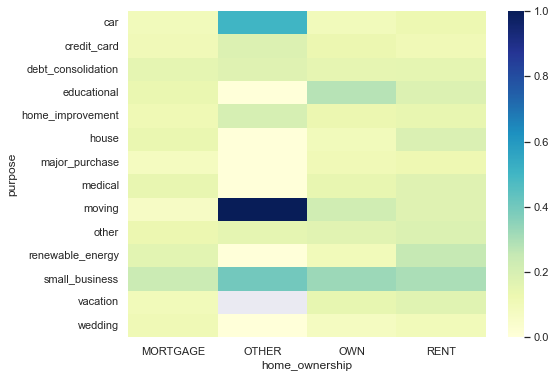

In [209]:
Bivariate_Categorical(x='home_ownership', y='purpose')


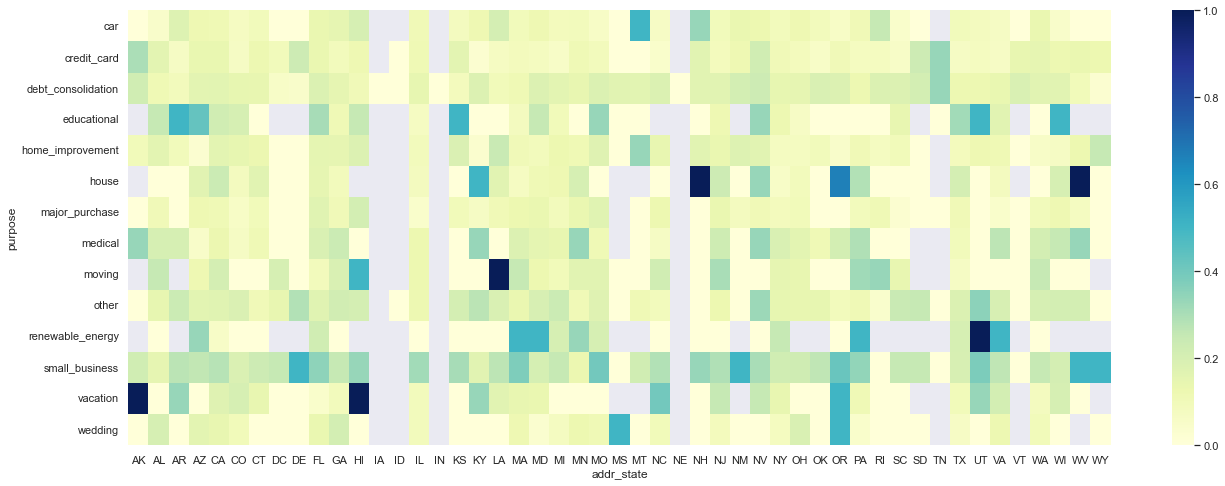

In [210]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

# the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. 
#Some of the examples are below: •vacation loans in AK, HI, OR 

#OR education loans in AR, KS, UT OR small business loans in DE, NM, WV, wY 
#wedding loans in MS, OR

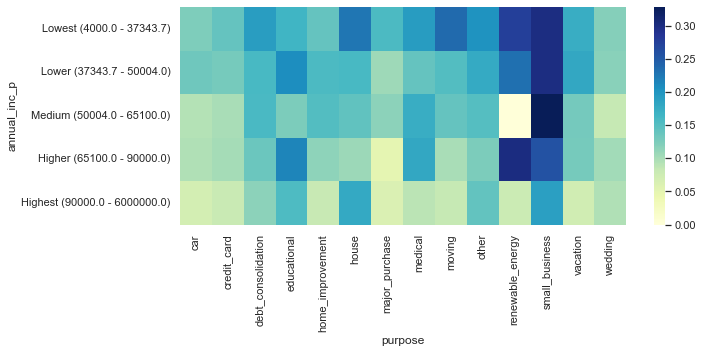

In [211]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

#Plot of various income groups versus the risky purposes of loans for them. 
#Some examples are: •small business loans for lowest and medium income groups 
#renewable energy loans for higher income group

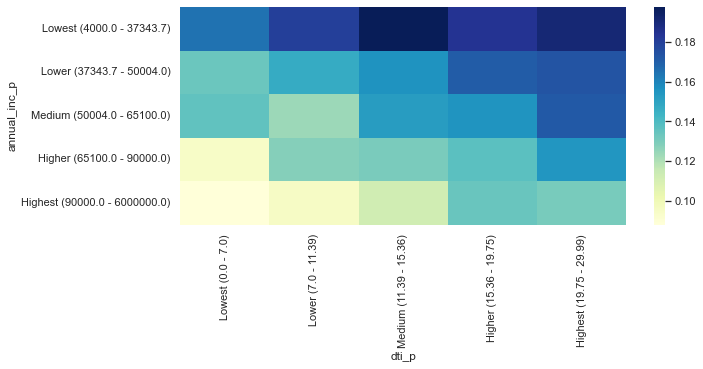

In [212]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

#Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.


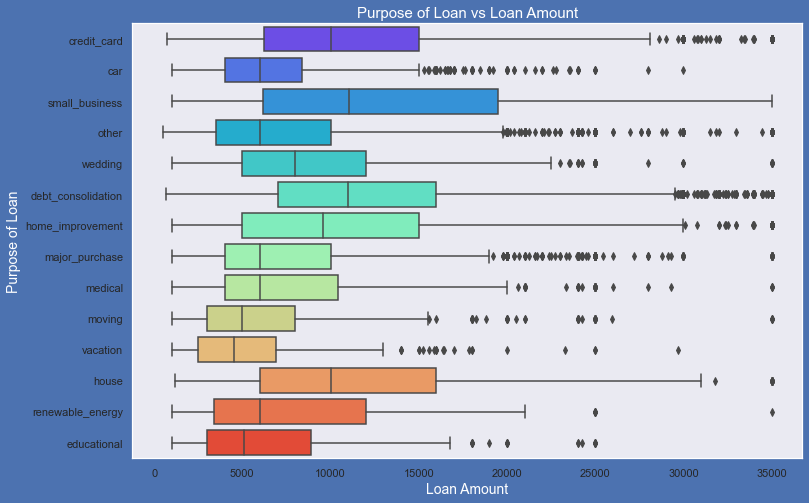

In [213]:
 
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot description

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loanDS,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

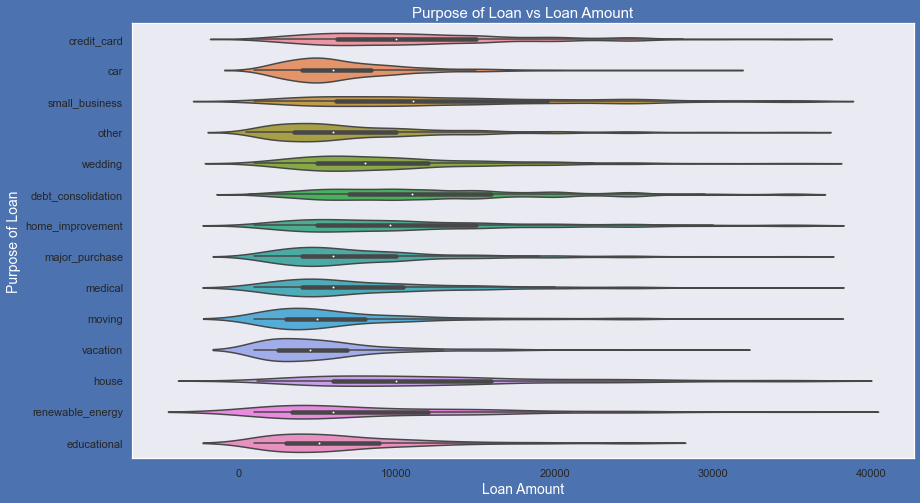

In [214]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loanDS)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

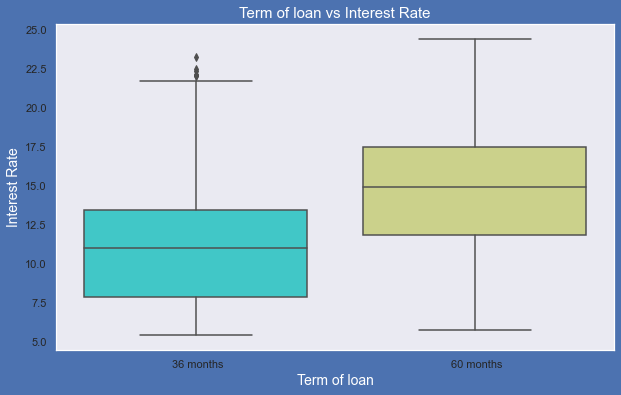

In [215]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loanDS,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

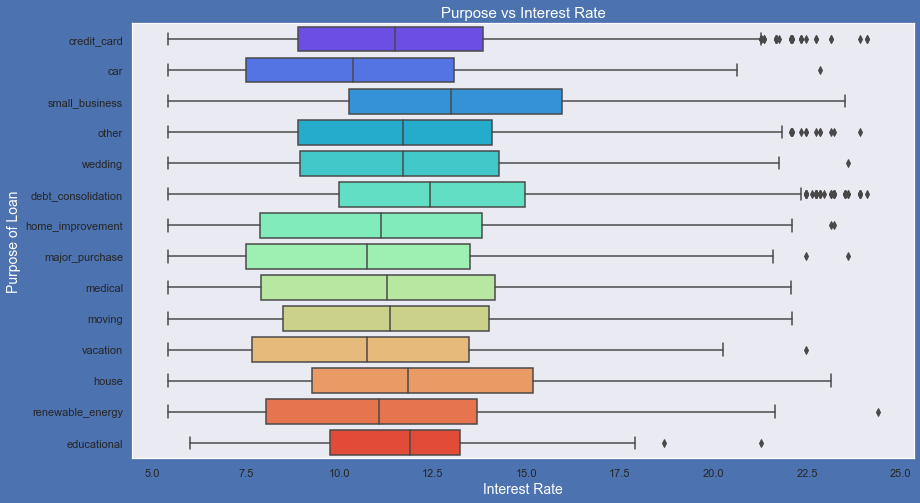

In [216]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loanDS,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

In [217]:
loanDS.shape

(37880, 36)

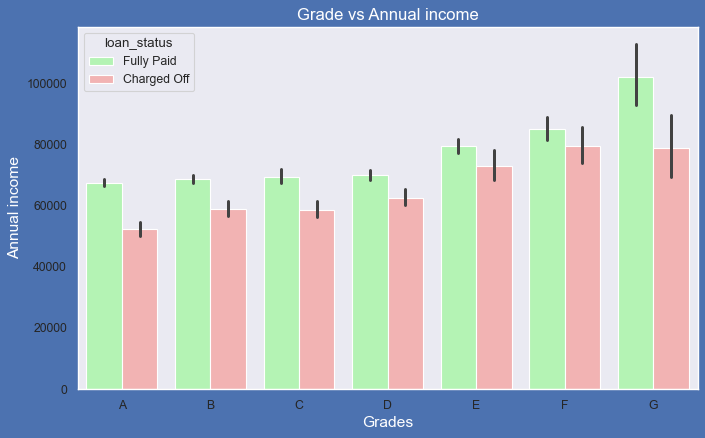

In [218]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loanDS, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

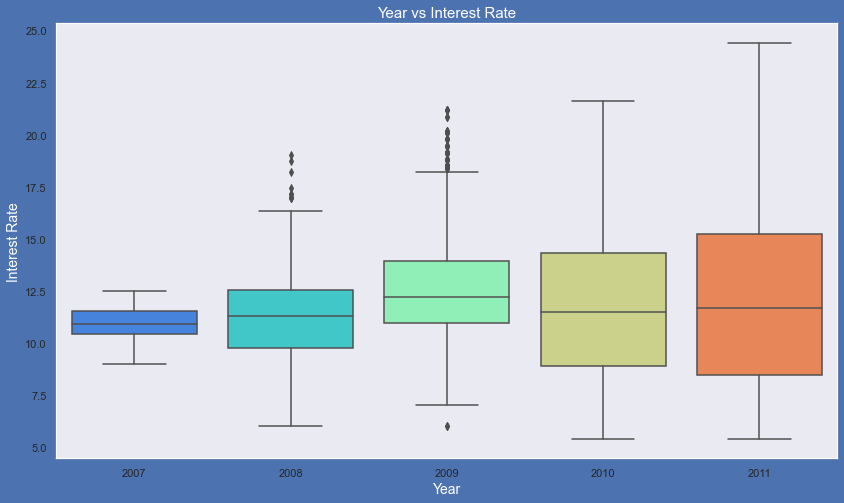

In [219]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loanDS,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


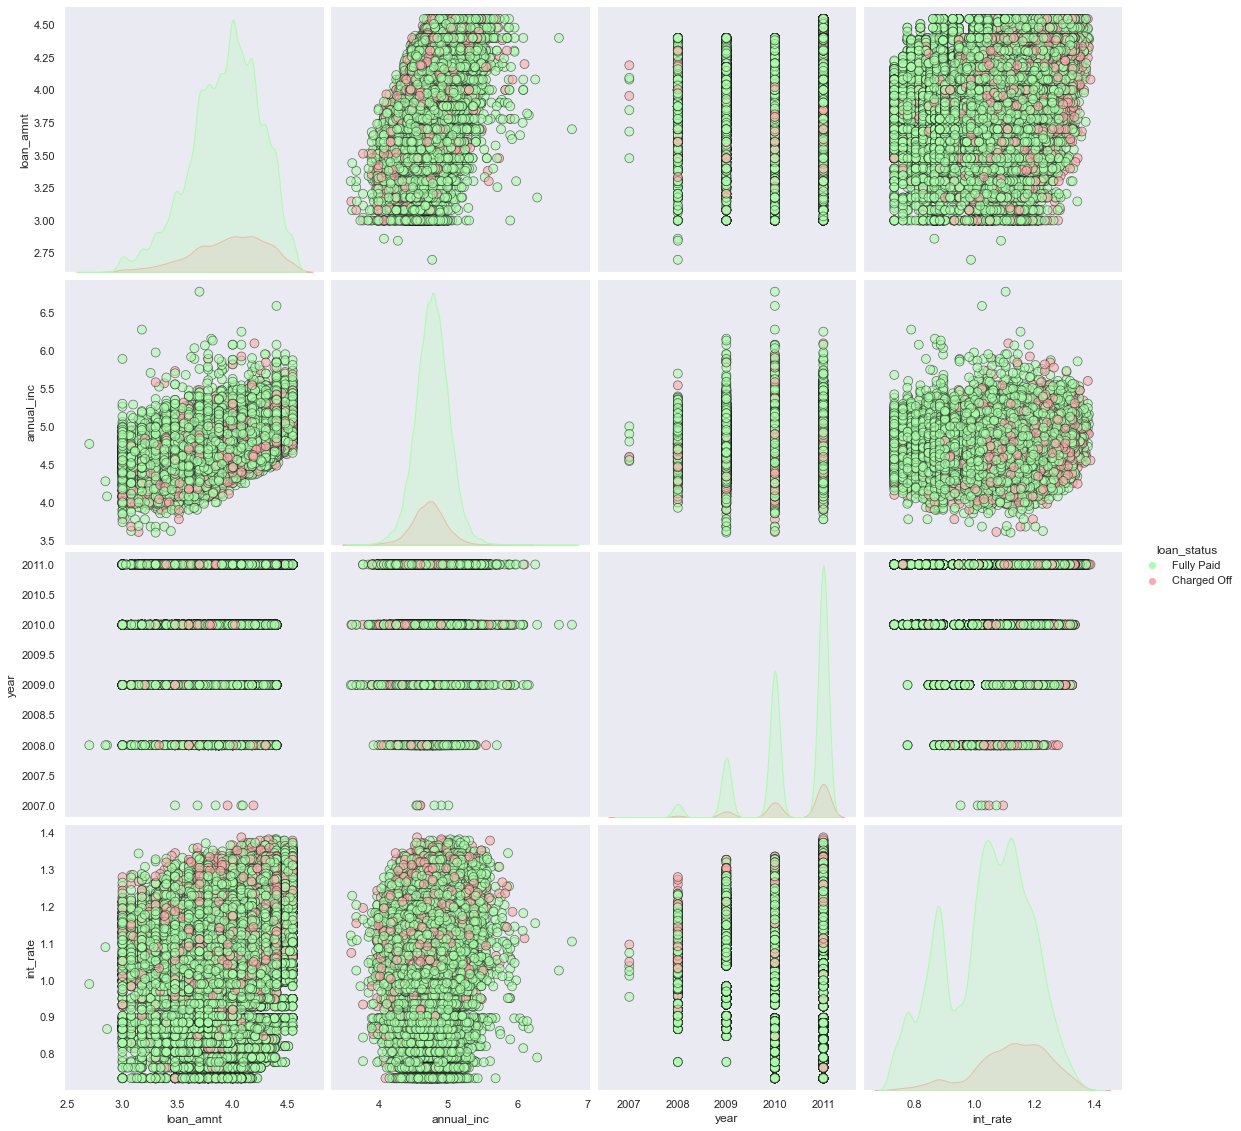

In [220]:
#MULTIVARIATE ANALYSIS 
# important columns from dataset separately.

loan_pair = loanDS[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate --- higher charged off ratio
# Higher the annual income ---higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase


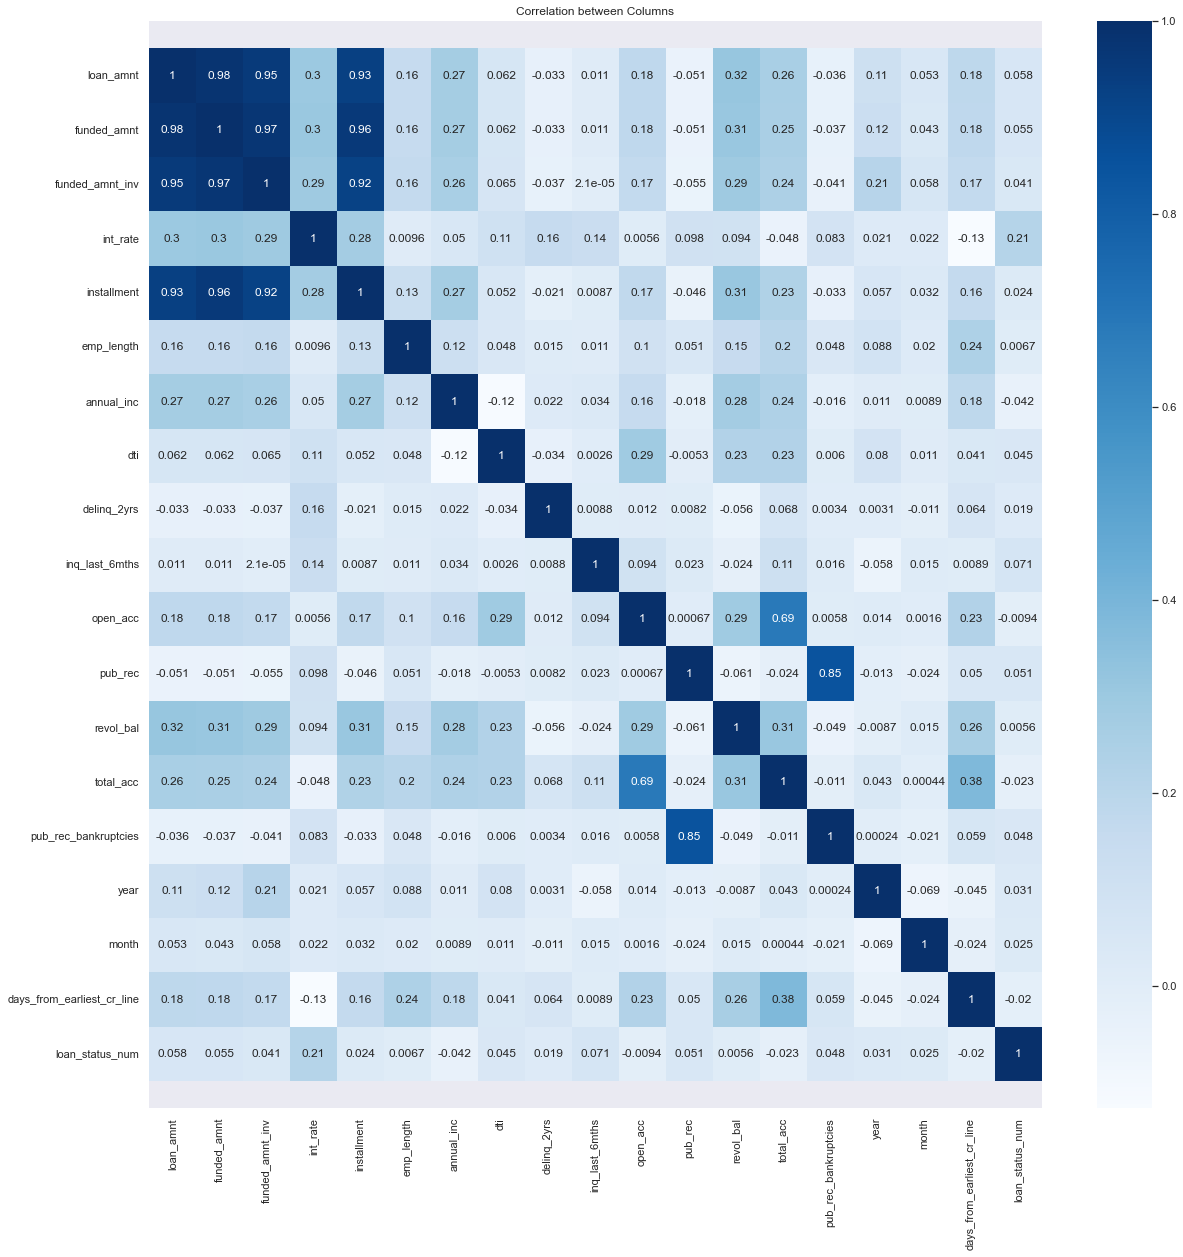

In [221]:
#CORRELATION MATRIX

#Finding correlation matric
corr_matrix = loanDS.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#Observations:
#The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.
#Interest rates are high for people with high revol utilisation.